<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/NLP/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_20220516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 노이즈 유형

In [ ]:
def pad_punctuation(sentence, punc):
    # 노이즈 유형 1
  for p in punc:
    sentence = sentence.replace(p, " " + p + " ")

  return sentence

In [ ]:
sentence = "Hi, my name is john."

print(pad_punctuation(sentence, [".", "?", "!", ","]))

Hi ,  my name is john . 


In [ ]:
# 노이즈 유형 2
# 소문자로 변경

sentence = "First, open the first chapter."
print(sentence.lower())

first, open the first chapter.


In [ ]:
# 노이즈 유형 2-1
## 대문자로 변경

sentence = "First, open the first chapter."
print(sentence.upper())

FIRST, OPEN THE FIRST CHAPTER.


In [ ]:
import re

# 노이즈 유형 3
sentence = "He is a ten-year-old boy."
sentence = re.sub("([^a-zA-Z.,?!])", " ", sentence)

print(sentence)

He is a ten year old boy.


In [ ]:
corpus = \
"""
"The Frost King," and published it in one of the Perkins Institution reports. This was the pinnacle of my happiness, from which I was in a little while dashed to earth. I had been in Boston only a short time when it was discovered that a story similar to "The Frost King," called "The Frost Fairies" by Miss Margaret T. Canby, had appeared before I was born in a book called "Birdie and His Friends." The two stories were so much alike in thought and language that it was evident Miss Canby's story had been read to me, and that mine was—a plagiarism. It was difficult to make me understand this; but when I did understand I was astonished and grieved. No child ever drank deeper of the cup of bitterness than I did. I had disgraced myself; I had brought suspicion upon those I loved best. And yet how could it possibly have happened? I racked my brain until I was weary to recall anything about the frost that I had read before I wrote "The Frost King"; but I could remember nothing, except the common reference to Jack Frost, and a poem for children, "The Freaks of the Frost," and I knew I had not used that in my composition.
"""

In [ ]:
def cleaning_text(text, punc, regex):
    # 노이즈 유형 1
    for p in punc:
        text = text.replace(p, " " + p + " ")

    # 노이즈 유형 2
    text = text.lower()

    # 노이즈 유형 3
    text = re.sub(regex, " ", text)
    
    return text

In [ ]:
print(cleaning_text(corpus, [".", "?", "!", ","], "[^a-zA-Z.,?!\n]"))


 the frost king ,   and published it in one of the perkins institution reports .  this was the pinnacle of my happiness ,  from which i was in a little while dashed to earth .  i had been in boston only a short time when it was discovered that a story similar to  the frost king ,   called  the frost fairies  by miss margaret t .  canby ,  had appeared before i was born in a book called  birdie and his friends .   the two stories were so much alike in thought and language that it was evident miss canby s story had been read to me ,  and that mine was a plagiarism .  it was difficult to make me understand this  but when i did understand i was astonished and grieved .  no child ever drank deeper of the cup of bitterness than i did .  i had disgraced myself  i had brought suspicion upon those i loved best .  and yet how could it possibly have happened ?  i racked my brain until i was weary to recall anything about the frost that i had read before i wrote  the frost king   but i could reme

# 토큰화

## 공백기반 토큰화

`"그녀는 나와 밥을 먹는다"` 라는 문장이 주어지면 공백 기준으로 나눈다고 가정해보자 

1.    `1: 그녀는` `2: 나와` `3: 밥을` `4: 먹는다` 4개 단어
2.   `1: 그녀` `2: 는` `3: 나` `4: 와` `5: 밥` `6: 을` `7: 먹는다` 잘개 쪼개어 7개 단어

그것은 우리가 정의할 **토큰화 기법이 결정할 부분**! 

문장을 어떤 기준으로 쪼개었을 때, 쪼개진 각 단어들을 **토큰(Token)** 이라고 부릅니다. 그리고 그 쪼개진 기준이 **토큰화(Tokenization) 기법**에 의해 정해지죠. 이번 스텝에서는 토큰화의 여러 가지 기법에 대해 배워보도록 하겠습니다.

 자연어의 노이즈를 제거하는 방법 중 하나로 우리는 `Hi,` 를 `Hi`와  `,`로 나누기 위해 문장부호 양옆에 공백을 추가해 주었습니다. 그것은 이 **공백 기반 토큰화**를 사용하기 위해서였죠! 당시의 예제 코드를 다시 가져와 공백을 기반으로 토큰화를 진행해 보겠습니다.

In [ ]:
corpus = \
"""
 the frost king ,   and published it in one of the perkins institution reports .  this was the pinnacle of my happiness ,  from which i was in a little while dashed to earth .  i had been in boston only a short time when it was discovered that a story similar to  the frost king ,   called  the frost fairies  by miss margaret t .  canby ,  had appeared before i was born in a book called  birdie and his friends .   the two stories were so much alike in thought and language that it was evident miss canby s story had been read to me ,  and that mine was a plagiarism .  it was difficult to make me understand this  but when i did understand i was astonished and grieved .  no child ever drank deeper of the cup of bitterness than i did .  i had disgraced myself  i had brought suspicion upon those i loved best .  and yet how could it possibly have happened ?  i racked my brain until i was weary to recall anything about the frost that i had read before i wrote  the frost king   but i could remember nothing ,  except the common reference to jack frost ,  and a poem for children ,   the freaks of the frost ,   and i knew i had not used that in my composition . 

"""

# HINT : split()을 사용하여 공백토큰화를 수행하세요.
tokens = corpus.split()

print("문장이 포함하는 Tokens:", tokens)

문장이 포함하는 Tokens: ['the', 'frost', 'king', ',', 'and', 'published', 'it', 'in', 'one', 'of', 'the', 'perkins', 'institution', 'reports', '.', 'this', 'was', 'the', 'pinnacle', 'of', 'my', 'happiness', ',', 'from', 'which', 'i', 'was', 'in', 'a', 'little', 'while', 'dashed', 'to', 'earth', '.', 'i', 'had', 'been', 'in', 'boston', 'only', 'a', 'short', 'time', 'when', 'it', 'was', 'discovered', 'that', 'a', 'story', 'similar', 'to', 'the', 'frost', 'king', ',', 'called', 'the', 'frost', 'fairies', 'by', 'miss', 'margaret', 't', '.', 'canby', ',', 'had', 'appeared', 'before', 'i', 'was', 'born', 'in', 'a', 'book', 'called', 'birdie', 'and', 'his', 'friends', '.', 'the', 'two', 'stories', 'were', 'so', 'much', 'alike', 'in', 'thought', 'and', 'language', 'that', 'it', 'was', 'evident', 'miss', 'canby', 's', 'story', 'had', 'been', 'read', 'to', 'me', ',', 'and', 'that', 'mine', 'was', 'a', 'plagiarism', '.', 'it', 'was', 'difficult', 'to', 'make', 'me', 'understand', 'this', 'but', 'when', 

## 형태소 기반 토큰화

하지만 우리에겐 영어 문장이 아닌 한국어 문장을 처리할 일이 더 많을 것이고, 한국어 문장은 **공백 기준**으로 토큰화를 했다간 **엉망진창의 단어들이 등장하는 것**을 알 수 있습니다. 문장부호처럼 **"은 / 는 / 이 / 가"**  양옆에 공백을 붙이자구요? 글쎄요... 가로 시작하는 단어만 해도 가면, 가위, 가족, 가수... 의도치 않은 변형이 너무나도 많이 일어날 것 같네요!

이를 어떻게 해결할 수 있을까요? 정답은 **형태소**에 있습니다. 어릴 적 국어 시간에 배운 기억이 새록새록 나시나요? 상기시켜드리면 형태소의 정의는 아래와 같습니다.

*(명사)  뜻을 가진 가장 작은 말의 단위.*

예를 들어, `오늘도 공부만 한다`  라는 문장이 있다면, `오늘`, `도`, `공부`, `만`, `한다` 로 쪼개지는 것이 바로 형태소죠. 한국어는 이를 활용해 토큰화를 할 수 있습니다!

한국어 형태소 분석기는 대표적으로 아래 두 가지가 사용됩니다.
- KoNLPy 파이썬 한국어 패키지
- kakao/khaiii

KoNLPy는 내부적으로 5가지의 형태소 분석 Class를 포함하고 있습니다. Khaiii까지 총 6개나 되는 형태소 분석기들은 **특수한 문장(띄어쓰기 X / 오탈자) 처리 성능, 속도** 측면에서 **차이**를 보입니다. 천하무적인 것은 (아직은) 없으니, 각 분석기를 직접 테스트해보고 적합한 것을 선택해 사용하면 됩니다.

### Colab에서 mecab설치하기

```
local에서 mecab 설치
$ pip install konlpy
$ pip install eunjeon
- from eunjeon import Mecab
- mecab = Mecab()
```

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 71.4 MB/s 
     |████████████████████████████████| 448 kB 37.8 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 22.82 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-17 00:30:33--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
L

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
# None자리에 문장을 넣어보고 토큰화 결과를 출력해보세요.

# 예시문장 : 자연어처리가너무재밌어서밥먹는것도가끔까먹어요
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [ ]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt
okt = Okt()
sentence = '자연어처리가너무재밌어서밥먹는것도가끔까먹어요'
okt.morphs(sentence)

['자연어', '처리', '가', '너무', '재밌어서', '밥', '먹는것도', '가끔', '까먹어요']

In [ ]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt
tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.nouns(kor_text))) # morphs, nouns, pos

[Hannanum] 
['코로나바이러스', '2019년', '12월', '중국', '우한', '발생', '뒤', '전', '세계', '확산', '유형', '호흡기', '감염', '질환']
[Kkma] 
['코로나', '코로나바', '바', '2019', '2019년', '년', '12', '12월', '월', '중국', '우', '처음', '발생', '뒤', '전', '세계', '확산', '새', '유형', '호흡기', '감염', '질환']
[Komoran] 
['코로나바이러스', '년', '12월', '중국', '우', '한', '처음', '발생', '뒤', '세계로', '확산', '유형', '호흡기', '감염', '질환']
[Mecab] 
['코로나', '바이러스', '년', '월', '중국', '우한', '처음', '발생', '뒤', '전', '세계', '확산', '유형', '호흡기', '감염', '질환']
[Okt] 
['코로나바이러스', '중국', '우한', '처음', '발생', '뒤', '전', '세계', '확산', '유형', '호흡기', '감염', '질환']


# 인코딩

## 단어 기반 인코딩

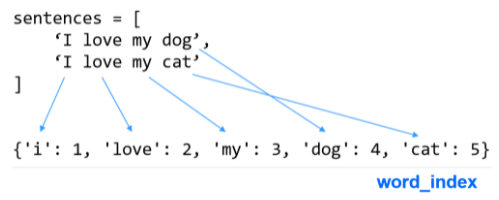

- Tokenizer(num_words = 100) : num_words를 단어 빈도수가 높은 순으로 100개만 사용한다는 의미이다. 나머지는 고려하지 않는다.
- fit_on_texts : 문자 데이터를 입력받아서 리스트의 형태로 변환
- word_index : tokenizer의 word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환한다. 이때, 반환 시 자동으로 소문자로 변환되어 들어간다. 그리고 느낌표나 마침표 같은 구두점은 자동으로 제거된다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
]

tokenizer = Tokenizer(num_words = 100) 
tokenizer.fit_on_texts(sentences) # 문자 데이터를 입력받아서 리스트의 형태로 변환

# 토큰별 단어에 index를 매핑시켜준다. word2index
word_index = tokenizer.word_index 
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


## 텍스트를 시퀀스로 변환하기

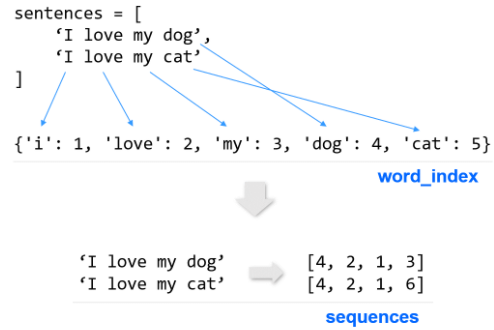

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences) # 텍스트를 시퀀스로 변환

print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[2, 1], [2, 1], [2, 1], [1]]


## 패딩설정하기

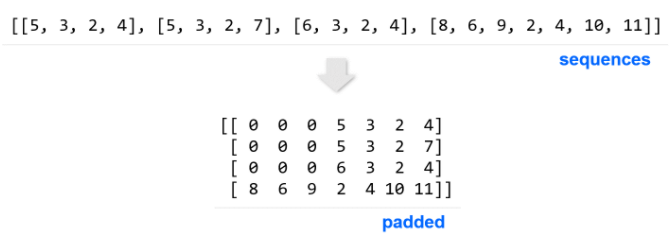

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>") ##OOV 단어장에 없는단어
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)

print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


## **한국어 - 영어 코퍼스 (실제 데이터)로 토근화 수행하기**

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
# 사이트에서 파일 다운로드/ gz파일로 됨
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

--2022-05-17 00:34:59--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-05-17 00:34:59--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean

In [ ]:
# 압축풀기
!tar -xzvf korean-english-park.train.tar.gz

korean-english-park.train.en
korean-english-park.train.ko


In [ ]:
# 파일불러오기
path_to_file = './korean-english-park.train.ko'

with open(path_to_file, 'r') as f:
  raw = f.read().splitlines()

print('Data Size: ', len(raw))

Data Size:  94123


In [ ]:
print('Examples: ')
for sen in raw[0:100][::20]: print('>>', sen)  ## [::20] 20개씩 건너뛰어서

Examples: 
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [ ]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print('문장의 최단길이 : ', min_len)
print('문장의 최장길이 : ', max_len)
print('문장의 평균길이 : ', sum_len//len(raw))

문장의 최단길이 :  1
문장의 최장길이 :  377
문장의 평균길이 :  60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

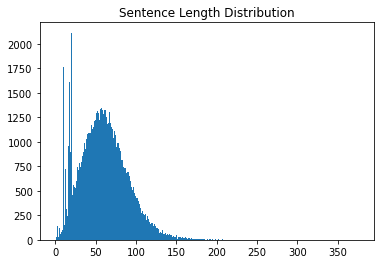

In [ ]:
sentence_length = np.zeros((max_len), dtype = np.int)
for sen in raw:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title('Sentence Length Distribution')
plt.show

In [ ]:
def check_sentence_with_length(raw, length):
  count = 0

  for sen in raw:
    if len(sen) == length:
      print(sen)
      count += 1
      if count > 100: return 

In [ ]:
#sentence_length 1인 문장 찾기
check_sentence_with_length(raw,1)

’


In [ ]:
for idx, _sum in enumerate(sentence_length):
  if _sum > 1500:
    print('Outlier Index : ', idx+1)

Outlier Index :  11
Outlier Index :  19
Outlier Index :  21


In [ ]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

# 중복 문장 삭제
cleaned_corpus = list(set(raw))
print('Data Size :', len(cleaned_corpus))

for sen in cleaned_corpus:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print('문장의 최단길이 : ', min_len)
print('문장의 최장길이 : ', max_len)
print('문장의 평균길이 : ', sum_len//len(cleaned_corpus))

Data Size : 77591
문장의 최단길이 :  1
문장의 최장길이 :  377
문장의 평균길이 :  64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

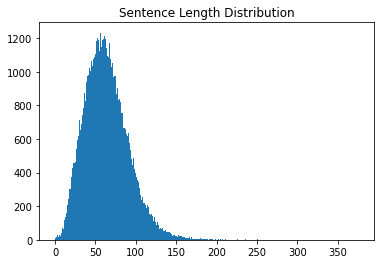

In [ ]:
sentence_length = np.zeros((max_len), dtype = np.int)
for sen in cleaned_corpus:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title('Sentence Length Distribution')
plt.show

In [ ]:
## 150이상 10 이하데이터는 버림

Data Size : 77591


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


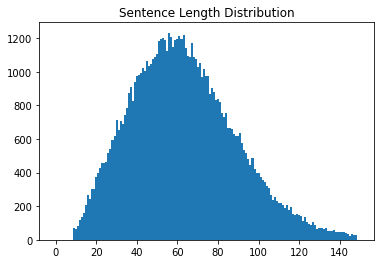

In [ ]:
min_len = 10
max_len = 150

filtered_corpus = [s for s in cleaned_corpus if (len(s)< max_len) & (len(s) >= min_len)]
print('Data Size :', len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize(corpus):
  # tokenizer = Tokenizer(num_words = 100, oov_token='<OOV')
  # tokenizer.fit_on_texts(corpus)
  # index_word= split_tokenizer.word_index
  # tensor = tokenizer.texts_to_sequences(corpus)

  # padded = pad_sequences(tensor)

  tokenizer = Tokenizer(filters = '')  # 숫자화
    # num_words : 단어 빈도가 많은 순서대로 num_words개의 단어를 보존한다.
    # filter : 걸러낼 문자 리스트 적어준다. 디폴트 : !"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n
    # lower : 소문자를 변환할지 Ture, False
    # split : 단어를 분리하는 기준을 적어줌
    # char_level : True인 경우 모든 문자가 토큰으로 처리가 된다.
    # oov_token : <OOV> <UNK>값이 지정된 경우, text_sequence호출과정에서 word_index추가되어서 out_of vovabulary words 대체
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)  ## array화
  tensor = pad_sequences(tensor, padding = 'post')

  return tensor, tokenizer

In [ ]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해보세요.

split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())
print(split_corpus[0:5])    

[['영국', '찰스', '왕세자의', '부인', '카밀라가', '이번주', '있을', '다이애나비', '사망', '10주년', '추모식에', '참석하지', '않을', '예정이라고', '밝혔다.'], ['The', 'International', 'Criminal', 'Court', 'file', "Sudan's", 'Darfur', 'massacre국제형사재판소,', '다르푸르', '사태', '수사2006.08', '원문', '&', '독해설명', '인쇄'], ['하트셉수트', '여왕은', '기원전', '15세기', '수염을', '달고', '남장을', '하며', '이집트를', '통치했으나', '퇴위한', '뒤', '모든', '흔적이', '사라져버렸다.'], ['현재', '생존하는', '케네디의', '유일한', '핏줄인', '캐롤라인은', '뉴욕', '주지사를', '만나', '힐러리', '클린턴', '상원의원의', '후임이', '되고', '싶다는', '뜻을', '밝혔습니다.'], ['5천500만', '그루를', '심어', '5만', '7,100', '헥타르의', '산을', '재조림했다.']]


In [ ]:
split_tensor, split_tokenizer = tokenize(split_corpus)
print("Split Vocab Size :", len(split_tokenizer.index_word)) 

Split Vocab Size : 237435


In [ ]:
for idx, word in enumerate(split_tokenizer.word_index):
  print(idx, ':', word)

  if idx>10 : break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


### **형태소 토큰화**

In [ ]:
# 위에서 사용한 코드를 활용해 Mecab단어 사전을 만들어주세요.
# Hint : mecab.morphs() --> 형태소 분석 수행
from konlpy.tag import Mecab
mecab = Mecab()

def mecab_split(sentence):
    
  return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))
print(mecab_corpus[99])

['그러나', '라이스', '장관', '은', '미국', '이', '한국', '에게', '북한', '에', '대해', '강경책', '을', '쓰', '도록', '압박', '을', '가하', '고', '있', '다는', '인상', '을', '주', '지', '않', '으려', '애썼', '다', '.']


In [ ]:
mecab_corpus[100]

['FOMC',
 '는',
 '또',
 '“',
 '위원회',
 '에서',
 '아직',
 '도',
 '가장',
 '중요',
 '시',
 '하',
 '는',
 '문제',
 '는',
 '인플레이션',
 '이',
 '기대치',
 '보다',
 '폭등',
 '하',
 '게',
 '되',
 '는',
 '상황',
 '이',
 '다',
 '”',
 '고',
 '덧붙였',
 '다',
 '.']

In [ ]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("Mecab Vocab Size :", len(mecab_tokenizer.index_word))
print(mecab_tokenizer.index_word)

Mecab Vocab Size : 52279
{1: '.', 2: '다', 3: '이', 4: '는', 5: '을', 6: '의', 7: '에', 8: '은', 9: '를', 10: '하', 11: '했', 12: '고', 13: '있', 14: '들', 15: '가', 16: '에서', 17: ',', 18: '한', 19: '것', 20: '으로', 21: '로', 22: '“', 23: '다고', 24: '”', 25: '과', 26: '인', 27: ')', 28: '(', 29: '일', 30: '그', 31: '지', 32: '명', 33: '와', 34: '말', 35: '적', 36: '기', 37: '할', 38: '었', 39: '라고', 40: '도', 41: '되', 42: '년', 43: '며', 44: '수', 45: '밝혔', 46: '않', 47: '미국', 48: '된', 49: '게', 50: '"', 51: '만', 52: '대통령', 53: '해', 54: '2', 55: '시간', 56: '던', 57: '에게', 58: '어', 59: '1', 60: '전', 61: '됐', 62: '았', 63: '받', 64: '정부', 65: '중', 66: '월', 67: '대한', 68: '\xa0', 69: '위해', 70: '현지', 71: '이번', 72: '전했', 73: '3', 74: '습니다', 75: '없', 76: '지난', 77: '주', 78: '지만', 79: '이라크', 80: '까지', 81: '한다', 82: '대해', 83: '‘', 84: '사람', 85: '될', 86: '’', 87: '경찰', 88: '지역', 89: '북한', 90: '미', 91: '면', 92: '자', 93: '중국', 94: '4', 95: '다는', 96: '5', 97: '그러나', 98: '자신', 99: '아', 100: '-', 101: '6', 102: '주장', 103: '발생', 104: '으며', 10

In [ ]:
mecab_tensor[100]

25019

In [ ]:
mecab_tokenizer.index_word[25019]

'fomc'

In [ ]:
#20220517

### **Detokenization**

1) tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
2) tokenizer.index_word 를 사용하여 Decoding

두 가지 방법으로 mecab_tensor[100] 을 원문으로 되돌려 보세요! (여기서 띄어쓰기는 고려하지 않습니다!)

In [ ]:
# Case 1 : mecab_tokenizer.sequences_to_texts()
texts = mecab_tokenizer.sequences_to_texts(mecab_tensor) 

print(texts[100])

fomc 는 또 “ 위원회 에서 아직 도 가장 중요 시 하 는 문제 는 인플레이션 이 기대치 보다 폭등 하 게 되 는 상황 이 다 ” 고 덧붙였 다 .


In [ ]:
# Case 2 : mecab_tokenizer.index_word[]

sentence = ""

for w in mecab_tensor[100]:
    if w == 0:
      sentence += ''
    elif w == 1:
      sentence += mecab_tokenizer.index_word[w]
    else:
      sentence += mecab_tokenizer.index_word[w] +' ' 
    
print(sentence)

fomc 는 또 “ 위원회 에서 아직 도 가장 중요 시 하 는 문제 는 인플레이션 이 기대치 보다 폭등 하 게 되 는 상황 이 다 ” 고 덧붙였 다 .


In [ ]:
for i in range(len(texts[100])):
    print(texts[100][i], ':' ,sentence[i])
print(len(texts[100]), len(sentence))

f : f
o : o
m : m
c : c
  :  
는 : 는
  :  
또 : 또
  :  
“ : “
  :  
위 : 위
원 : 원
회 : 회
  :  
에 : 에
서 : 서
  :  
아 : 아
직 : 직
  :  
도 : 도
  :  
가 : 가
장 : 장
  :  
중 : 중
요 : 요
  :  
시 : 시
  :  
하 : 하
  :  
는 : 는
  :  
문 : 문
제 : 제
  :  
는 : 는
  :  
인 : 인
플 : 플
레 : 레
이 : 이
션 : 션
  :  
이 : 이
  :  
기 : 기
대 : 대
치 : 치
  :  
보 : 보
다 : 다
  :  
폭 : 폭
등 : 등
  :  
하 : 하
  :  
게 : 게
  :  
되 : 되
  :  
는 : 는
  :  
상 : 상
황 : 황
  :  
이 : 이
  :  
다 : 다
  :  
” : ”
  :  
고 : 고
  :  
덧 : 덧
붙 : 붙
였 : 였
  :  
다 : 다
  :  
. : .
84 84
